<a href="https://colab.research.google.com/github/ayush-09/Self-Organizing-Map/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [9]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=09da15712592dfa05d4bec34bd752d325b235fefd99a50f1907ee1602a008838
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


In [11]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


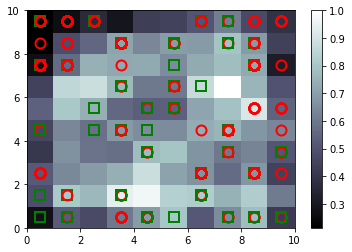

In [18]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [25]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(8,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [31]:
frauds[:,0]

array([0.53757874, 0.73253407, 0.40793821, 0.87362301, 0.94405936,
       0.91495181, 0.7677122 , 0.81622078, 0.74826712, 0.9592278 ])

In [33]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(round(i,5))

Fraud Customer IDs
0.53758
0.73253
0.40794
0.87362
0.94406
0.91495
0.76771
0.81622
0.74827
0.95923
